Text(0.5, 1.0, 'Trainingloss')

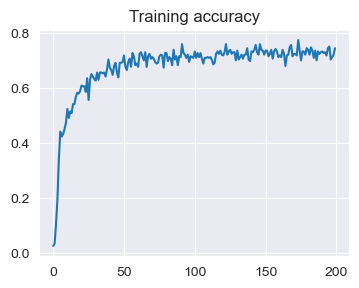

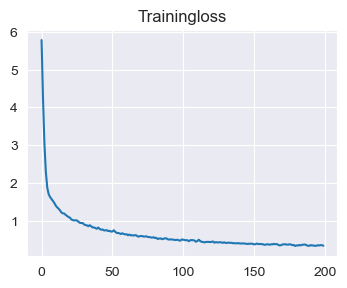

In [9]:
import numpy as np
from numpy import genfromtxt
import time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LayerNormalization,Dense,LSTM,Reshape,Flatten,Conv1D,BatchNormalization,ReLU,GlobalAveragePooling1D,Conv1DTranspose
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers



para_len=9
my_data = genfromtxt("new_siqrd_pol.csv", delimiter=',')
X=my_data[:,0:para_len] # Paramaeters
Y=my_data[:,para_len:] #Policies




X = pd.DataFrame({'p1': np.squeeze(X[:,0]), 'p2': np.squeeze(X[:,1]), 'p3': np.squeeze(X[:,2]), 'p4': np.squeeze(X[:,3]), 'p5': np.squeeze(X[:,4]),'p6': np.squeeze(X[:,5]),'p7': np.squeeze(X[:,6]),'p8': np.squeeze(X[:,7]),'p9': np.squeeze(X[:,8])})

Y = pd.DataFrame({'Pol1': np.squeeze(Y[:,0]), 'Pol2': np.squeeze(Y[:,1]), 'Pol3': np.squeeze(Y[:,2]), 'Pol4': np.squeeze(Y[:,3]), 'Pol5': np.squeeze(Y[:,5]),
                            'Pol6': np.squeeze(Y[:,6]), 'Pol7': np.squeeze(Y[:,8]), 'Pol8': np.squeeze(Y[:,9])})
Y=Y.to_numpy()
X=X.to_numpy()

Z=np.copy(Y)

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# thr=list(np.max(Y[:,:],axis=0))

# for j in range(Y.shape[1]):
#     Y[:,j]=Y[:,j]+sum(thr[:j])+j




# buff=np.zeros((Y.shape[0],int(np.max(Y))))

# for i in range(buff.shape[0]):
#     for j in range(buff.shape[1]):
#         if j in list(Y[i,:]):
#             buff[i,j]=1

# scaler2 = MinMaxScaler()
# Y = scaler2.fit_transform(Y)




# scaler2 = MinMaxScaler()
# Y = scaler2.fit_transform(Y)

# add noise to Y
# Y = Y + 0.01*np.random.normal(0, 0.1, Y.shape) 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Reshape((1,n_inputs)))
    # model.add(BatchNormalization())
    # model.add(LayerNormalization())
    # model.add(LSTM(9, return_sequences=True))
    # model.add(BatchNormalization())
    # model.add(LSTM(9, return_sequences=True))
    # model.add(BatchNormalization())
    # model.add(Conv1D(filters=1, kernel_size=1, strides=1, padding="causal",activation='relu'))
    model.add(Conv1DTranspose(filters=16*2, kernel_size=4,strides=1,padding='same',kernel_regularizer=regularizers.l2(0.01)))
    model.add(ReLU())
    # # model.add(LayerNormalization())
    # # model.add(Dropout(0.1))
    model.add(BatchNormalization())
    # # model.add(LayerNormalization())
    model.add(Conv1DTranspose(filters=16*2, kernel_size=4,strides=1,kernel_regularizer=regularizers.l2(0.01)))
    model.add(ReLU())

    model.add(BatchNormalization())


    

    # model.add(Conv1DTranspose(filters=16*2, kernel_size=1,strides=1,kernel_regularizer=regularizers.l2(0.01)))
    # model.add(ReLU())

    # model.add(BatchNormalization())
    # model.add(Conv1DTranspose(filters=4, kernel_size=4,kernel_regularizer=regularizers.l2(0.01), use_bias=False))
    # model.add(ReLU())
    # model.add(BatchNormalization())


    # model.add(Conv1DTranspose(filters=128/4, kernel_size=2, strides=8, padding='same', use_bias=False))
    # model.add(ReLU())
    # model.add(Dropout(0.1))
    # model.add(GlobalAveragePooling1D())

    # model.add(Conv1D(filters=32, kernel_size=14,strides=1, padding="causal"))
    # model.add(LayerNormalization())
    # model.add(ReLU())
    # model.add(Dropout(0.1))

    # model.add(Conv1D(filters=16, kernel_size=3,strides=1, padding="same"))
    # model.add(BatchNormalization())
    # model.add(ReLU())
    # model.add(Dropout(0.1))

    # model.add(GlobalAveragePooling1D())
    model.add(Flatten())
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    # model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    # model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    # model.add(Dropout(0.2))
    # model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    # model.add(Dropout(0.2))

    # model.add(Dense(32*2, kernel_initializer='normal', activation='relu'))
	# model.add(Dense(1, kernel_initializer='normal'))
    # model.add(Dense(1, activation='sigmoid'))
    
    # model.add(Dense(32*2, kernel_initializer='he_uniform', activation='relu'))
    # model.add(BatchNormalization())
    # model.add(Reshape((1,64)))
    # model.add(Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation='relu'))
    # model.add(Conv1D(filters=16, kernel_size=5,strides=1, padding="causal"))
    # model.add(Conv1D(filters=8, kernel_size=5,strides=1, padding="causal"))
    
    # model.add(ReLU())
    # model.add(BatchNormalization())
    # model.add(Flatten())
    # model.add(BatchNormalization())

    # model.add(Dropout(0.2))
    # model.add(Dense(32, kernel_initializer='he_uniform', activation='selu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(64/2, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(64/4, kernel_initializer='he_uniform', activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    # # model.add(Dense(32*2, input_dim=n_inputs, kernel_initializer='he_uniform', activation='tanh'))
    model.add(Dense(n_outputs,activation='linear'))
    model.compile(loss='mse', 
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])
    return model

n_inputs, n_outputs = X.shape[1], Y.shape[1]

model = get_model(n_inputs, n_outputs)

history=model.fit(X,Y, batch_size=32,verbose=0,epochs=200)

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(4,3),dpi=100)

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']


loss = history.history['loss']
    


epochs = range(len(loss))

plt.plot(epochs, acc)
# plt.plot(epochs, val_acc)
plt.title('Training accuracy')

plt.figure(figsize=(4,3),dpi=100)

plt.plot(epochs, loss)
# plt.plot(epochs, val_acc)

plt.title('Trainingloss')


In [10]:
model.save('par2policy2.h5')

In [11]:
from sklearn.metrics import mean_absolute_error
y_predictim=model.predict(X)
y_predictim=np.ceil(y_predictim)
# y_predictim=scaler2.inverse_transform(y_predictim)

# y_test=scaler2.inverse_transform(y_test)
y_test=y_test
print(mean_absolute_error(y_predictim,Y))


0.4426470588235294


In [12]:
from itertools import chain
greek_codes   = chain(range(0x370, 0x3e2), range(0x3f0, 0x400))
greek_symbols = (chr(c) for c in greek_codes)
greek_letters = [c for c in greek_symbols if c.isalpha()]
my_letters=greek_letters[51:61]
para_names=[my_letters[5],my_letters[1]+str(1),my_letters[1]+str(2),my_letters[0]+str(1),my_letters[0]+str(2),my_letters[3],'K','to',my_letters[2]]
print(para_names)

['ζ', 'β1', 'β2', 'α1', 'α2', 'δ', 'K', 'to', 'γ']


In [13]:
# load keras model
model = keras.models.load_model('par2policy2.h5')

In [17]:
from sklearn import preprocessing
my_data = genfromtxt("optimal_par.csv", delimiter=',')
my_data_ref=genfromtxt("passive_par.csv", delimiter=',')
X=my_data[0:para_len] # Paramaeters
X=np.expand_dims(X,axis=0)



X = scaler.fit_transform(X)

y_pred=model.predict(X)


# for j in range(y_pred.shape[1]):
#     y_pred[:,j]=y_pred[:,j]-sum(thr[:j])-j



# y_pred=scaler2.inverse_transform(y_pred)

# scaler = MinMaxScaler(feature_range=(0, 4))
# scaler.fit(y_pred)
# y_pred=y_pred/np.max(y_pred)*4
y_pred=np.abs(np.floor(y_pred))




print("OVAR1: ",y_pred[0][0])
print("OVAR3: ",y_pred[0][1])
print("OVAR5: ",y_pred[0][2])
print("OVAR7: ",y_pred[0][3])
print("OVAR13: ",y_pred[0][4])
print("OVAR15: ",y_pred[0][5])
print("OVAR24: ",y_pred[0][6])
print("OVAR40: ",y_pred[0][7])

# "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40"
# Y = pd.DataFrame({'Pol1': np.squeeze(Y[:,0]), 'Pol2': np.squeeze(Y[:,1]), 'Pol3': np.squeeze(Y[:,2]), 'Pol4': np.squeeze(Y[:,3]), 'Pol5': np.squeeze(Y[:,5]),
#                             'Pol6': np.squeeze(Y[:,6]), 'Pol7': np.squeeze(Y[:,8]), 'Pol8': np.squeeze(Y[:,9])})


OVAR1:  2.0
OVAR3:  2.0
OVAR5:  2.0
OVAR7:  4.0
OVAR13:  1.0
OVAR15:  2.0
OVAR24:  1.0
OVAR40:  1.0


Zeta

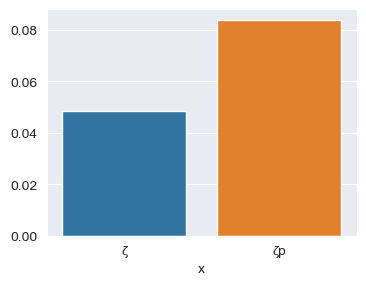

In [15]:
import seaborn as sns
from matplotlib import figure

plt.figure(figsize=(4,3),dpi=100)
sns.set_style('darkgrid')

alpha=[my_data_ref[0],my_data[0]]
x=[para_names[0],para_names[0]+'p']
daty = pd.DataFrame({'': alpha, 'x': x})
ax = sns.barplot(x='x', y='', data=daty)

Controlled Data

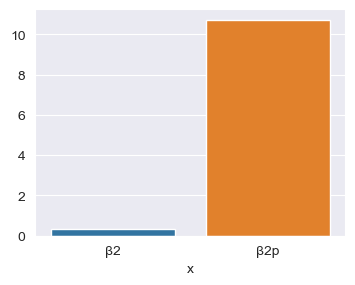

In [16]:
import seaborn as sns
from matplotlib import figure

plt.figure(figsize=(4,3),dpi=100)
sns.set_style('darkgrid')

alpha=[my_data_ref[2],my_data[2]]
x=[para_names[2],para_names[2]+'p']
daty = pd.DataFrame({'': alpha, 'x': x})
ax = sns.barplot(x='x', y='', data=daty)